In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 

In [2]:
df = pd.read_csv('E:/4 курс/Интелеетуальный анализ данных/Кластеризация/Страны/CIA_Country_Facts.csv')

In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.isnull().sum ()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
df[['Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 
    'Agriculture', 'Industry', 'Service', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']] = df[['Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 
    'Agriculture', 'Industry', 'Service', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']]. fillna (0)

In [7]:
df.isnull().sum ()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Кластеризация 

In [8]:
df = pd.get_dummies(df)

In [9]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_df = scaler.fit_transform(df)

In [13]:
from sklearn.cluster import KMeans

In [14]:
ssd = []

# цикл для определения оптимального количества кластеров

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    # Сумма квадратов расстояний от точек до ближайших центров кластеров
    # (SSD - Sum of squared distances)
    ssd.append(model.inertia_) #записали метрику

In [15]:
model # вывод количества кластеров

KMeans(n_clusters=29)

In [16]:
#model = KMeans(n_clusters=2) # проводит кластеризацию

In [17]:
# Посмотрите видео-лекцию, чтобы узнать разницу между этой командой, fit() и transform()
cluster_labels = model.fit_predict(scaled_df)

In [18]:
# ВАЖНОЕ ЗАМЕЧАНИЕ: Ваши 0 и 1 могут быть противоположными,
# потому что сами номера кластеров не имеют особого смысла!
cluster_labels

array([ 0,  8, 17, 11, 26,  7, 13, 13, 13, 10, 13, 21, 26, 10, 13,  9, 12,
       14, 10, 26,  3,  5, 20,  0,  3,  8, 16, 13, 13, 18,  8,  7,  0,  5,
        0,  5,  6,  2, 13,  7,  7, 13, 15, 13,  5,  7,  7, 21, 13,  5, 27,
       14,  9,  8,  4,  7, 14, 14, 12, 13, 17, 14, 16,  7, 28,  7,  1, 21,
       26,  4, 13, 21,  7,  5,  9, 10,  4,  5,  1, 26, 20, 14, 13, 19,  3,
        4,  7,  5,  3, 14,  3, 22,  8, 26, 15, 12, 12,  9, 26, 26,  9,  1,
       14, 18, 26,  9, 10,  7, 21, 12, 18,  9, 10,  0, 28,  9, 16,  7, 17,
       26, 28,  1, 24,  8,  7,  5, 12, 12,  7,  1, 21, 13,  7,  2,  5, 13,
       25, 10, 24,  0,  3, 17,  7,  7, 23,  0, 26, 13, 21, 21,  3,  7,  5,
       19, 26,  9,  0, 21, 13, 23,  3,  3, 12,  8, 26, 13,  9,  2,  8,  6,
        5,  2, 13, 13, 20, 14, 11,  1,  5,  9,  7, 27,  2,  7, 22,  8, 27,
       23,  7, 16, 26, 12,  7,  3, 16, 26, 26,  9, 18, 10,  7, 12,  5, 21,
       14, 17,  9, 10, 13, 23,  5, 10,  9, 26,  6, 13, 10, 23, 13, 12, 13,
       19,  9, 17,  9,  7

In [19]:
df['Cluster'] = cluster_labels

In [20]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Cluster
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,8
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,17
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,11
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,...,0,0,0,1,0,0,0,0,0,9
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,...,0,0,0,0,1,0,0,0,0,17
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,...,0,0,0,1,0,0,0,0,0,9
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,...,0,0,0,0,0,0,0,1,0,7


In [21]:
df.corr()['Cluster']

Population                                   -0.006005
Area (sq. mi.)                               -0.076689
Pop. Density (per sq. mi.)                    0.163659
Coastline (coast/area ratio)                  0.207893
Net migration                                 0.033467
                                                ...   
Region_NORTHERN AMERICA                       0.046281
Region_OCEANIA                                0.353760
Region_SUB-SAHARAN AFRICA                    -0.363735
Region_WESTERN EUROPE                         0.266355
Cluster                                       1.000000
Name: Cluster, Length: 257, dtype: float64

Text(0, 0.5, ' Sum of Squared Distances')

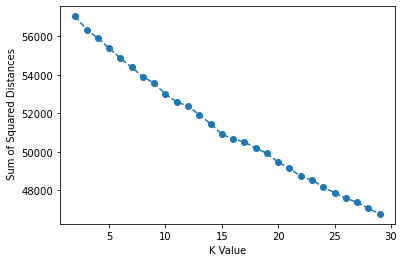

In [22]:
# метод локтя: найти значение, где приломляется (должно быть минимальным)
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [23]:
ssd

[57038.64216202226,
 56341.64694991229,
 55903.94897507932,
 55372.56407869316,
 54862.71841372547,
 54387.79001458498,
 53895.50975519913,
 53562.67765841569,
 52991.521298917985,
 52593.105949949226,
 52381.242727657656,
 51915.81795982661,
 51461.83392561353,
 50917.3271176313,
 50664.29388681305,
 50513.94083763295,
 50199.83038065736,
 49917.85994436058,
 49466.56466083313,
 49136.21680563696,
 48730.73382410913,
 48532.10848037583,
 48178.63907635081,
 47878.426987069746,
 47584.02930306762,
 47389.206183697184,
 47068.26733974166,
 46778.59797208605]

In [24]:
# Изменение метрики SSD - текущее минус предыдущее значение!
pd.Series(ssd).diff()

0            NaN
1    -696.995212
2    -437.697975
3    -531.384896
4    -509.845665
5    -474.928399
6    -492.280259
7    -332.832097
8    -571.156359
9    -398.415349
10   -211.863222
11   -465.424768
12   -453.984034
13   -544.506808
14   -253.033231
15   -150.353049
16   -314.110457
17   -281.970436
18   -451.295284
19   -330.347855
20   -405.482982
21   -198.625344
22   -353.469404
23   -300.212089
24   -294.397684
25   -194.823119
26   -320.938844
27   -289.669368
dtype: float64

#### Метод силуэта

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [26]:
n_clusters=4
km = KMeans(n_clusters=4,init="k-means++",n_init=10,max_iter=300)
km.fit(df)
cluster_labels = km.predict(df)

silhouette_avg = silhouette_score(df,cluster_labels)

each_silhouette_score = silhouette_samples(df,cluster_labels,metric="euclidean")

In [27]:
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

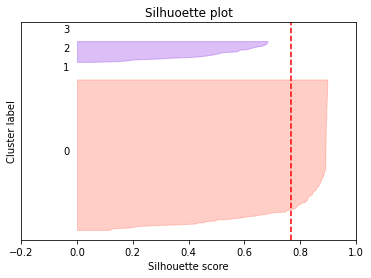

In [28]:
n_clusters=4
km = KMeans(n_clusters=6,init="k-means++",n_init=20,max_iter=600)
km.fit(df)
cluster_labels = km.predict(df)

#Рассчитайте среднее значение баллов по силуэту
silhouette_avg = silhouette_score(df,cluster_labels)

#Рассчитайте оценку силуэта для каждого из данных
each_silhouette_score = silhouette_samples(df,cluster_labels,metric="euclidean")
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #обозначьте участки sil house номерами их кластеров в середине
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #вычислите новый y_lower для следующего графика
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("Silhouette score")
ax.set_ylabel("Cluster label")
    
#вертикальная линия для средней оценки силуэта по всем значениям
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

### Классификация

#### Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [32]:
X = pd.get_dummies(df.drop('Cluster',axis=1),drop_first=True)
y = df['Cluster']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Классификатор "Дерево решений" 

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
model = DecisionTreeClassifier()

In [117]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
base_pred = model.predict(X_test)
base_pred

array([ 9, 21,  0,  6, 18,  1, 26,  3, 13, 28,  3, 18, 28, 21, 18, 28, 20,
       15,  4, 17, 17, 15,  9, 17, 18, 17, 12, 10, 12, 21, 17, 18, 28,  4,
       28, 11, 18,  3,  4, 13,  9, 10,  8,  0, 13, 18, 12,  6,  5,  7, 21,
       11, 21,  5,  9,  0,  3,  9, 12, 12,  3, 28,  8, 17, 12, 28, 21, 18,
       24])

#### Оценка работы модели 

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [120]:
confusion_matrix(y_test,base_pred)

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [121]:
# отчет
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.62      0.77         8
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       0.20      0.50      0.29         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         1
          12       0.83      0.83      0.83         6
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         2
          15       0.50      0.50      0.50         2
          17       0.50      0.60      0.55         5
          18       0.50    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [122]:
model.feature_importances_

array([0.04212274, 0.01004493, 0.01562544, 0.01205391, 0.03176601,
       0.04497388, 0.14056736, 0.00669662, 0.01217567, 0.03814623,
       0.06886709, 0.07625601, 0.01217567, 0.03558774, 0.00669662,
       0.02678647, 0.        , 0.01205391, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01250035, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [123]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Population,0.042123
Area (sq. mi.),0.010045
Pop. Density (per sq. mi.),0.015625
Coastline (coast/area ratio),0.012054
Net migration,0.031766
...,...
Region_NORTHERN AFRICA,0.000000
Region_NORTHERN AMERICA,0.000000
Region_OCEANIA,0.038793
Region_SUB-SAHARAN AFRICA,0.049468


#### Визуализация дерева

In [124]:
from sklearn.tree import plot_tree

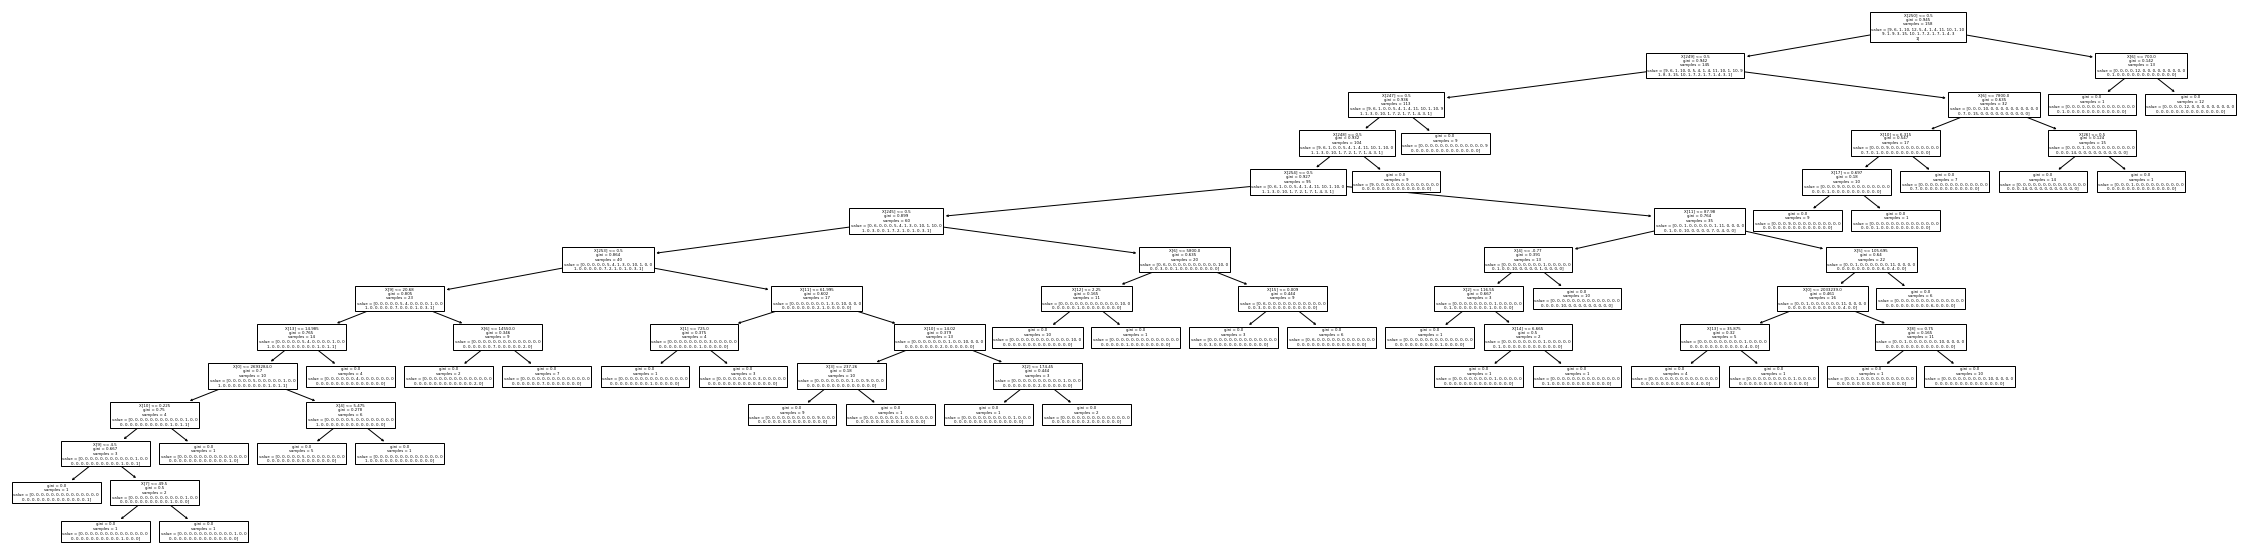

In [125]:
plt.figure(figsize=(40,10))
plot_tree(model);

#### Результаты модели

In [126]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [127]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.04      1.00      0.07         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          17       0.31      0.80      0.44         5
          18       0.00    

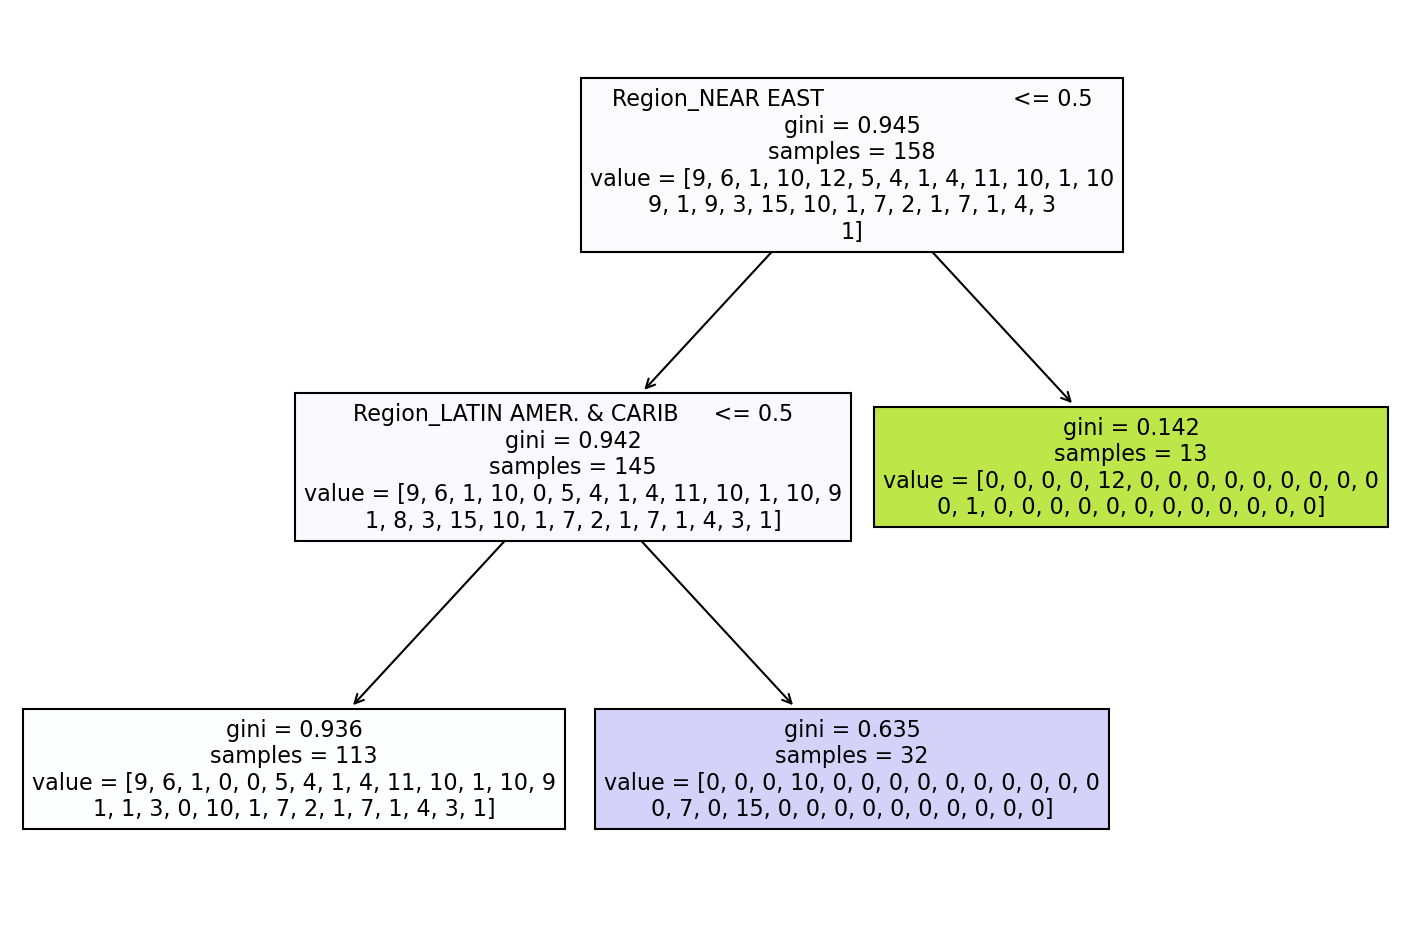

In [128]:
report_model(pruned_tree)

### Сравнение: Деревья решений и метод ближайших соседей